In [64]:
pip install shap

In [65]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import pandas as pd

from random import randint

from pprint import pprint
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GroupKFold, GroupShuffleSplit
from pprint import pprint
import shap
shap.initjs()
import zipfile
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, TimeSeriesSplit, cross_validate
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from copy import deepcopy

from lightgbm import LGBMClassifier

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
data = pd.read_csv('/content/drive/MyDrive/intern_task.csv')


In [74]:
data.describe(include = "all")

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
count,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,2.352580e+05,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.0,235258.0,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.0,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,2.352580e+05,235258.000000,235258.000000,235258.000000,2.352580e+05,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.0,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,2.352580e+05,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,2.352580e+05,2.352580e+05,2.352580e+05,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000
mean,0.677869,14828.413401,1.911960,0.206233,1.189847,0.550272,1.960082,0.803964,0.097557,0.541174,500.000000,0.834909,663.542035,1.526142,8.411803,7.921308,681.401287,10.283856,20.688222,18.649408,19.994009,10.269423,0.500000,0.318977,1.503966,0.591023,24.871877,5.392675,0.092498,0.445154,0.193511,6.194387,14.647153,0.220447,0.938761,0.43330

Как видим в данных нет пустых значений

In [69]:
#фичи фича 72 всегда принимает значение 1 поэтому её можно удалить
data.drop('feature_72',axis=1, inplace = True)
pd.set_option('display.max_columns', None)
data.loc[data['query_id']==25]

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
92,0,25,3.0,0.0,0.0,0.0,3.0,1.000000,0.0,0.000000,0.391062,1.000000,577.0,0.0,1.0,7.0,585.0,18.731221,32.499462,29.199486,31.942644,18.728818,0.000391,0.0,0.0,0.0,23.0,1.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,15.0,782.123380,0.0,0.000000,0.000000,7.666667,32.888889,0.0,0.000000,0.000000,32.888889,0.039861,0.0,0.000000,4.417340,0.039316,0.001733,0.0,0.0,0.0,0.001709,0.025997,0.0,0.000000,0.000000,0.025641,0.013287,0.0,0.000000,0.000000,0,0,0.0,0.000000,0.000000,0.000096,114.441258,0.0,0.000000,114.423858,10.148582,0.0,0.0,0.0,10.148071,82.901633,0.0,0.000000,0.000000,82.894794,38.147086,0.0,0.000000,0.000000,38.141286,1022.550210,0.0,0.000000,0.000000,1022.468003,1.0,0.0,0.0,0.0,1.0,0,0.0,0.000000,0.000000,0.608837,37.920344,0.0,0.000000,0.000000,37.996053,-15.772366,0.0,-30.818268,-32.273961,-15.813557,-18.874251,0.0,-34.195581,-35.812230,-18.883172,-14.734511,0.0,-33.616105,-35.067895,-14.775791,2.0,49.0,0.0,0.0,266.0,5370.0,2.0,31.0,0.0,0.0,0.000000,0.000000,0.608863,0.000000,0.000000,0.013105,0.000099,23.0,7.666667
93,0,25,2.0,0.0,0.0,0.0,2.0,0.666667,0.0,0.000000,0.395312,0.666667,1719.0,0.0,4.0,8.0,1731.0,18.731221,32.499462,29.199486,31.942644,18.728818,0.000395,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,6.0,790.624721,0.0,0.000000,0.000000,2.333333,6.888889,0.0,0.000000,0.000000,6.888889,0.004072,0.0,0.000000,3.962029,0.004044,0.000000,0.0,0.0,0.0,0.000000,0.003490,0.0,0.000000,0.000000,0.003466,0.001357,0.0,0.000000,0.000000,0,0,0.0,0.000000,0.000000,0.000002,23.861956,0.0,0.000000,23.852885,0.000000,0.0,0.0,0.0,0.000000,18.335180,0.0,0.000000,0.000000,18.326565,7.953985,0.0,0.000000,0.000000,7.950962,58.975479,0.0,0.000000,0.000000,58.916609,0.0,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.000000,0.380075,9.476019,0.0,0.000000,0.000000,9.552231,-32.447200,0.0,-30.818268,-32.273961,-32.457883,-31.684584,0.0,-34.195581,-35.812230,-31.689558,-32.086134,0.0,-33.616105,-35.067895,-32.095885,4.0,42.0,0.0,0.0,210.0,10551.0,15.0,1.0,0.0,0.0,0.000000,0.000000,0.380128,0.000000,0.000000,0.001348,0.000002,7.0,2.333333
94,0,25,3.0,0.0,1.0,0.0,3.0,1.000000,0.0,0.333333,0.399563,1.000000,277.0,0.0,6.0,8.0,291.0,18.731221,32.499462,29.199486,31.942644,18.728818,0.000400,0.0,1.0,0.0,6.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,0.0,2.0,799.126062,0.0,0.333333,0.000000,2.000000,0.222222,0.0,0.222222,0.000000,0.000000,0.018051,0.0,0.166667,6.529345,0.020619,0.00

<Axes: title={'center': 'rank, 235258'}, ylabel='Frequency'>

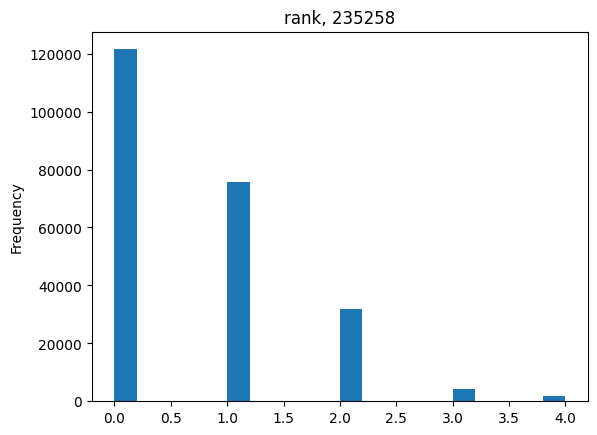

In [43]:
data['rank'].plot(kind='hist', bins=20, title='rank, '+str(len(data['rank'])))

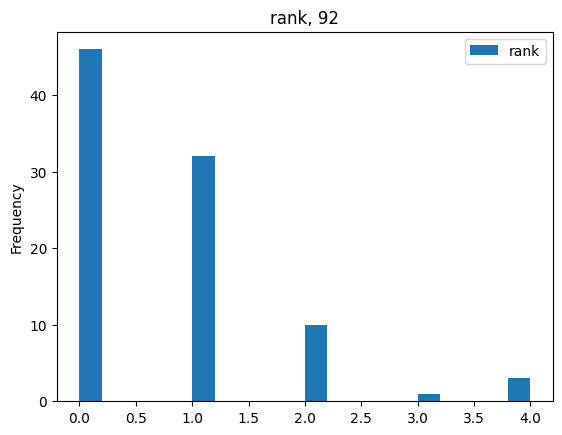

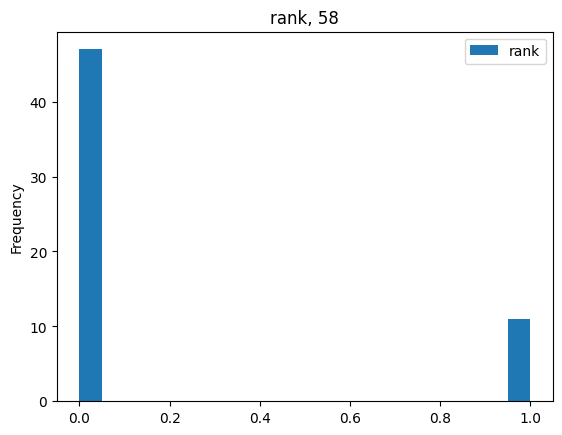

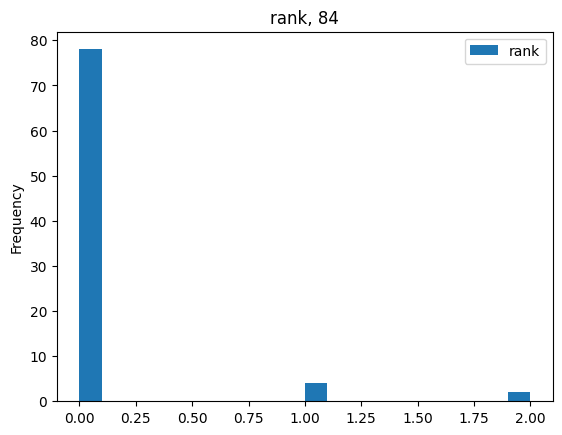

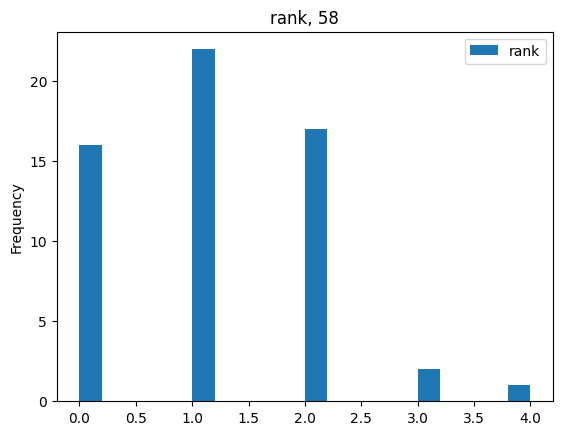

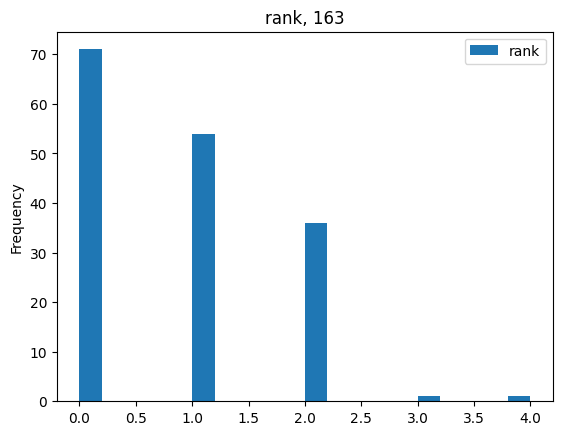

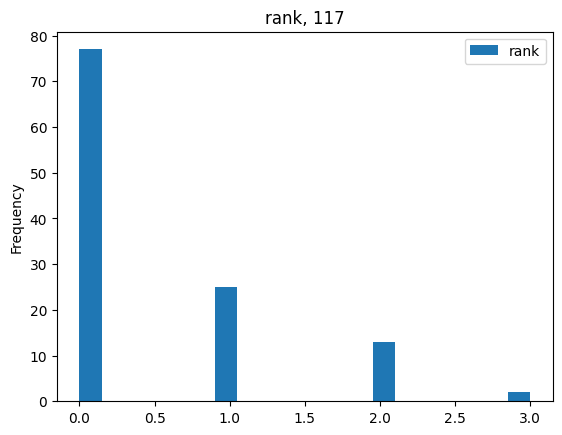

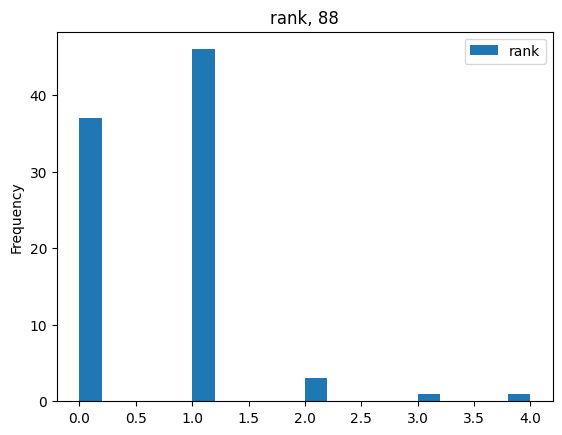

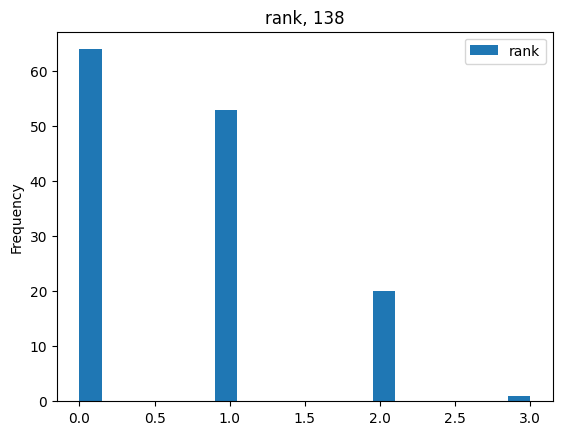

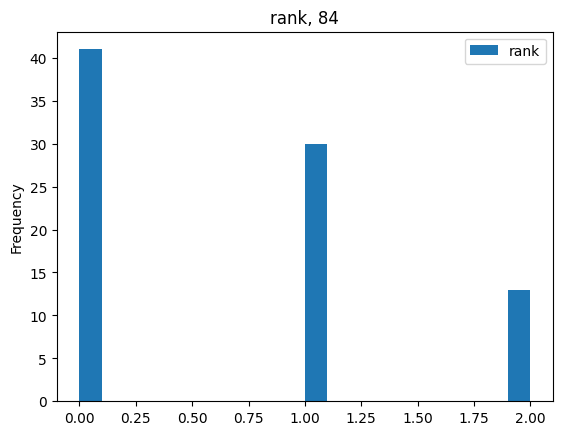

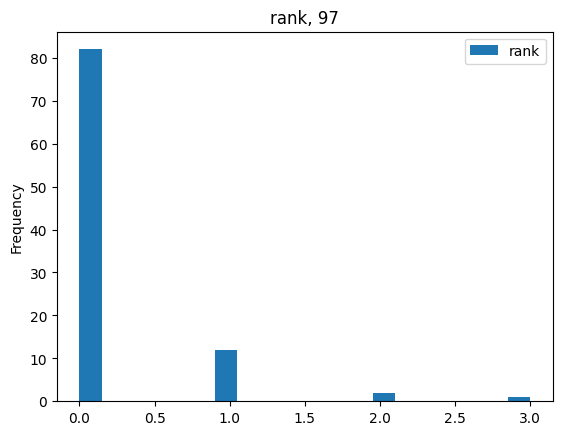

In [44]:
k=0
for i in data['query_id'].unique():
  data_10 = data.loc[data['query_id']==i]
  k+=1
  data_10[['rank']].plot(kind='hist', bins=20, title='rank, '+str(len(data_10['rank'])))

  if k==10:
    break
name_columns = list(data)

In [45]:
#как видим есть запросы в которых не разметили 4 и 3 ранк

Посмотрим на значения фич в каждой строке, чтобы найти аномальные значения и выкинуть их


<ipython-input-46-4ddabc03b216>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6, 1, 1)
<ipython-input-46-4ddabc03b216>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 1, 5)


<Axes: >

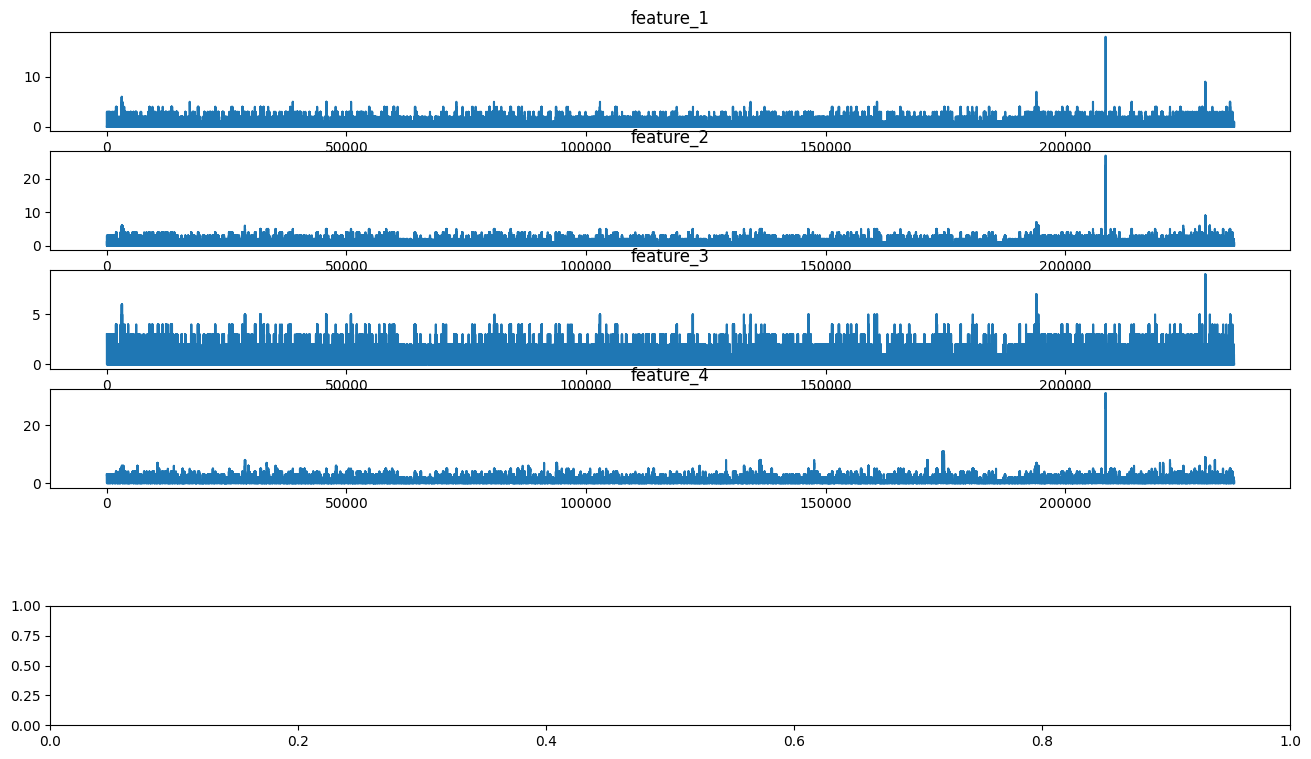

In [46]:
data['feature_0'].plot(kind='line', figsize=(16, 9), title='feature_0')
plt.subplot(6, 1, 1)
data['feature_1'].plot(kind='line', figsize=(16, 9), title='feature_1')
plt.subplot(6, 1, 2)
data['feature_2'].plot(kind='line', figsize=(16, 9), title='feature_2')
plt.subplot(6, 1, 3)
data['feature_3'].plot(kind='line', figsize=(16, 9), title='feature_3')
plt.subplot(6, 1, 4)
data['feature_4'].plot(kind='line', figsize=(16, 9), title='feature_4')
plt.subplot(6, 1, 5)
data['feature_5'].plot(kind='line', figsize=(16, 9), title='feature_5')
plt.subplot(5, 1, 5)

Как видим в одну и ту же сессию были анломалии на нескольких фичах, поэтому её стоит удалить из рассмотрения(это сессии 25585 и 29005)

In [47]:
 data = data.loc[data['query_id']!=25585]
 data = data.loc[data['query_id']!=29005]

In [48]:
#разделим выборку на трейн и тест, где на тесте будет 25% сессий, всё остальное треин
print(data['query_id'].unique()[int(len(data['query_id'].unique())*0.75):][0])
X = name_columns[2:]
Y = name_columns[:1]
buckets = name_columns[1:2]
df_test = data.loc[(data['query_id']>22480)]
df_train = data.loc[data['query_id']<=22480] # треин
X_train,y_train,q_train,X_test,y_test,q_test =  df_train[X].values,df_train[Y].values.ravel(),df_train['query_id'].values,df_test[X].values,df_test[Y].values.ravel(),df_test['query_id'].values


22480
26995


Будем строить ранжирование на двух библиотеках LGBMRanker и на Catboost

In [49]:
#LGBMRanker
#создадим массив, где будет перечислаться колличество документов в каждом query_id
from lightgbm import LGBMRanker
groups_train = []
for i in (df_train['query_id'].unique()):
  groups_train.append(len(df_train.loc[df_train['query_id']==i]))
groups_test = []
for i in (df_test['query_id'].unique()):
  groups_test.append(len(df_test.loc[df_test['query_id']==i]))

In [50]:
#зададим гиперпараметры для модели
model_return = LGBMRanker(n_estimators=118,
                          random_state=42,
                          num_leaves=41,
                          learning_rate=0.05,
                          #max_bin =20,
                          #subsample_for_bin=20000,
                          colsample_bytree=0.7,
                          n_jobs=2,
                          objective='lambdarank')
model_return.fit(X = X_train, y = y_train,
             group = groups_train,
             eval_set=[(X_test, y_test)],
             eval_group=[groups_test],
             eval_metric = ['map',''])

[LightGBM] [Info] Total groups: 1499, total data: 185575
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.336027 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 26296
[LightGBM] [Info] Number of data points in the train set: 185575, number of used features: 140
[LightGBM] [Info] Total groups: 499, total data: 49578


LGBMRanker(colsample_bytree=0.7, learning_rate=0.05, n_estimators=118, n_jobs=2,
           num_leaves=41, objective='lambdarank', random_state=42)

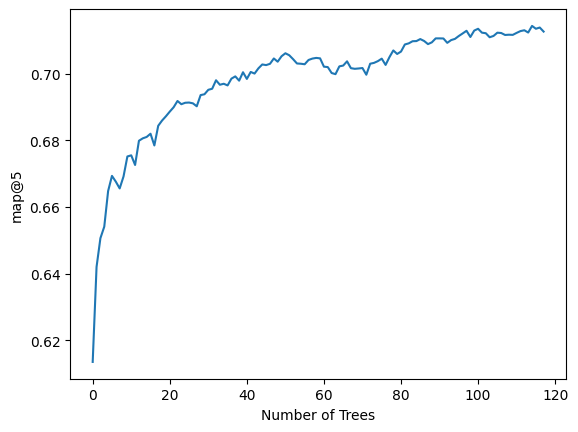

In [51]:
map_5 = model_return.evals_result_['valid_0']['map@5']
plt.plot([x for x in range(118)], map_5)
plt.xlabel('Number of Trees')
plt.ylabel('map@5')
plt.show()

Попробуем подобрать лучшие гиперпараметры для ранжирования с помощью оптуны

In [52]:
pip install optuna

In [53]:
import optuna

def objective(trial):
    """Train Light GBM model"""

    ranking_param_grid = {
        'learning_rate': trial.suggest_float('learning_rate', 0.06, 0.14, step=0.02),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500, step=100),
        'num_leaves': trial.suggest_int('num_leaves', 25, 35, 1),
        'max_depth': trial.suggest_int('max_depth', -1, 500, 50)
    }

    gbm = LGBMRanker(n_jobs=24,objective='lambdarank', **ranking_param_grid)
    gbm.fit(X_train, y_train, group=groups_train, eval_set=[(X_test, y_test)],
                    eval_metric='ndcg', eval_group=[groups_test], eval_at=[15, 5, 10]
                    )

    return list(gbm.best_score_['valid_0'].values())[2]

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

In [54]:
model_return = LGBMRanker(**{'learning_rate': 0.06, 'n_estimators': 120, 'num_leaves': 29, 'max_depth': 299},
                          n_jobs=2,
                          objective='lambdarank')
model_return.fit(X = X_train, y = y_train,
             group = groups_train,
             eval_set=[(X_test, y_test)],
             eval_group=[groups_test],
             eval_metric = ['map'],
             eval_at=[15, 5, 10])

[LightGBM] [Info] Total groups: 1499, total data: 185575
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.812890 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 26296
[LightGBM] [Info] Number of data points in the train set: 185575, number of used features: 140
[LightGBM] [Info] Total groups: 499, total data: 49578


LGBMRanker(learning_rate=0.06, max_depth=299, n_estimators=120, n_jobs=2,
           num_leaves=29, objective='lambdarank')

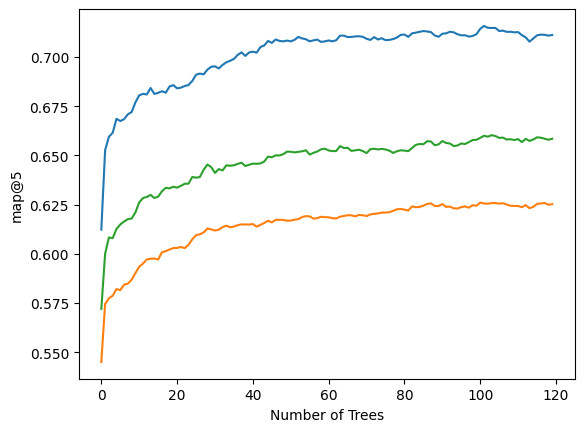

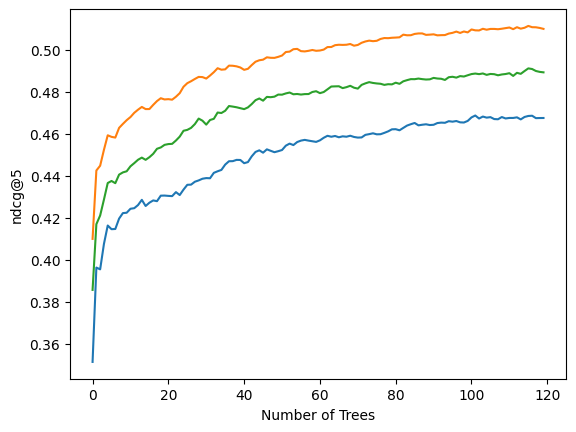

In [55]:
map_15 = model_return.evals_result_['valid_0']['map@15']
map_5 = model_return.evals_result_['valid_0']['map@5']
map_10 = model_return.evals_result_['valid_0']['map@10']
ndcg_15 = model_return.evals_result_['valid_0']['ndcg@15']
ndcg_10 = model_return.evals_result_['valid_0']['ndcg@10']
ndcg_5 = model_return.evals_result_['valid_0']['ndcg@5']
plt.plot([x for x in range(120)], map_5)
plt.plot([x for x in range(120)], map_15)
plt.plot([x for x in range(120)], map_10)
plt.xlabel('Number of Trees')
plt.ylabel('map@5')
plt.show()
plt.plot([x for x in range(120)], ndcg_5)
plt.plot([x for x in range(120)], ndcg_15)
plt.plot([x for x in range(120)], ndcg_10)
plt.xlabel('Number of Trees')
plt.ylabel('ndcg@5')
plt.show()

In [57]:
# пример ранжировки запроса
df_test_22495 = df_test.loc[df_test['query_id']==29230]
df_test_22495['scores']=model_return.predict(df_test.loc[df_test['query_id']==29230][X])
df_test_22495=df_test_22495.sort_values(by='scores', ascending=False)
df_test_22495

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,scores
230754,1,29230,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,980.859231,1.0,305.0,4.0,2.0,7.0,318.0,8.255377,12.856158,11.95453,9.978812,8.146893,0.980859,1.0,1.0,0.0,8.0,6.0,1.0,1.0,0.0,8.0,6.0,1.0,1.0,0.0,8.0,1.961718e+06,1.0,1.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.019672,0.25,0.500000,4.470522,0.025157,0.019672,0.25,0.500000,0.000000,0.025157,0.019672,0.25,0.500000,0.000000,0.025157,0.019672,0.25,0.500000,0.000000,0,0,0.0,0.0,0.0,0.0,49.532263,12.856158,0.000000,65.175144,49.532263,12.856158,11.95453,0.000000,65.175144,49.532263,12.856158,11.95453,0.000000,65.175144,49.532263,12.856158,11.95453,0.000000,65.175144,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0,1.0,1.0,0.0,1.0,23.970655,11.991875,20.544858,0.000000,24.671622,-4.052593,-2.590258,-1.897116,-3.688728,-3.774167,-5.950871,-7.600954,-7.600063,-7.596094,-5.668852,-4.033909,-1.491654,-0.798507,-2.590260,-3.787967,2.0,35.0,3224.0,2.0,64772.0,41376.0,1.0,2.0,32.0,317.0,153.465427,0.000000,1.0,11.95453,0.0,0.025157,0.0,6.0,6.0,1.578645
230789,1,29230,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,981.008004,1.0,247.0,0.0,2.0,4.0,253.0,8.255377,12.856158,11.95453,9.978812,8.146893,0.981008,0.0,1.0,0.0,7.0,6.0,0.0,1.0,0.0,7.0,6.0,0.0,1.0,0.0,7.0,1.962016e+06,0.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.024291,0.00,0.500000,2.574963,0.027668,0.024291,0.00,0.500000,0.000000,0.027668,0.024291,0.00,0.500000,0.000000,0.027668,0.024291,0.00,0.500000,0.000000,0,0,0.0,0.0,0.0,0.0,49.532263,0.000000,0.000000,57.028251,49.532263,0.000000,11.95453,0.000000,57.028251,49.532263,0.000000,11.95453,0.000000,57.028251,49.532263,0.000000,11.95453,0.000000,57.028251,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0,0.0,1.0,0.0,1.0,24.441268,0.000000,20.544858,0.000000,24.661659,-3.841670,-3.506535,-1.897116,-3.688728,-3.692829,-5.925387,-7.603944,-7.600063,-7.596094,-5.773917,-3.822987,-2.407945,-0.798507,-2.590260,-3.692837,1.0,19.0,0.0,1.0,64768.0,41434.0,2.0,2.0,0.0,2231.0,146.201506,0.000000,1.0,11.95453,0.0,0.027668,0.0,6.0,6.0,1.131670
230753,3,29230,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,980.854980,1.0,165.0,0.0,2.0,4.0,171.0,8.255377,12.856158,11.95453,9.978812,8.146893,0.980855,0.0,1.0,1.0,10.0,8.0,0.0,1.0,1.0,10.0,8.0,0.0,1.0,1.0,10.0,1.961710e+06,0.0,1.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.048485,0.00,0.500000,4.404521,0.058480,0.048485,0.00,0.500000,0.250000,0.058480,0.048485,0.00,0.500000,0.250000,0.058480,0.048485,0.00,0.500000,0.250000,0,0,0.0,

Как видим, модель делает хорошее ранжирование, были посчитаны такие метрики как map, ndcg @5,@10,@15

In [58]:
pd.options.mode.chained_assignment = None

In [59]:
#вручную реализуем метрику PValue
def PValue(df):
  df_r=df[['rank','query_id']]
  df_r['scores'] = model_return.predict(df[X])
  df_r=df_r.sort_values(by='scores', ascending=False)
  ranks = df_r['rank'].values.ravel()
  pi_s = [1]
  p_break = 0.15
  pd_s = [0,0.07,0.14,0.41,0.61]
  result=0
  for i in range(1,len(ranks)):
    pi_s.append(pi_s[i-1]*(1-p_break)*(1-pd_s[ranks[i-1]]))
  for i in range(len(ranks)):
    result+= pi_s[i]*pd_s[ranks[i]]
  return result
def PValues(df):
   query_id_s = df['query_id'].unique()
   Pv = 0
   for i in query_id_s:
    Pv+=PValue(df.loc[df['query_id']==i])
   return Pv/len(query_id_s)
print(PValues(df_train))
print(PValues(df_test))

0.4936100610235676
0.45570398075452045


In [60]:
#посчитаем метрику на изначальных данных
def PValue_1(df):
  df_r=df[['rank','query_id']]
  ranks = df_r['rank'].values.ravel()
  pi_s = [1]
  p_break = 0.15
  pd_s = [0,0.07,0.14,0.41,0.61]
  result=0
  for i in range(1,len(ranks)):
    pi_s.append(pi_s[i-1]*(1-p_break)*(1-pd_s[ranks[i-1]]))
  for i in range(len(ranks)):
    result+= pi_s[i]*pd_s[ranks[i]]
  return result
def PValues_1(df):
   query_id_s = df['query_id'].unique()
   Pv = 0
   for i in query_id_s:
    Pv+=PValue_1(df.loc[df['query_id']==i])
   return Pv/len(query_id_s)
print(PValues_1(data))

0.22718990510061937
